## Estimates of Location

This sections is about the mean and median

In [1]:
import pandas as pd
state = pd.read_csv("state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [2]:
print(state['Population'].mean())
print(state['Population'].median())

6162876.3
4436369.5


In [3]:
from scipy.stats import trim_mean
print(trim_mean(state['Population'],0.1))

4783697.125


In [4]:
import numpy as np

In [5]:
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

## Estimates of Variability

It is about dispersion, how tighly clustered or spread out is the data

In [9]:
print("std deviation = " + str(state['Population'].std()))
print("Q3-Q1 = " + str(state['Population'].quantile(0.75)-state['Population'].quantile(0.25)))

std deviation = 6848235.347401142
Q3-Q1 = 4847308.0


In [12]:
print(state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95]))
print(state["Murder.Rate"].mean())

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64
4.066


## Exploratory Data Analysis

Use of graphs to get an idea of the data distribution

Text(0, 0.5, 'Population (Millions)')

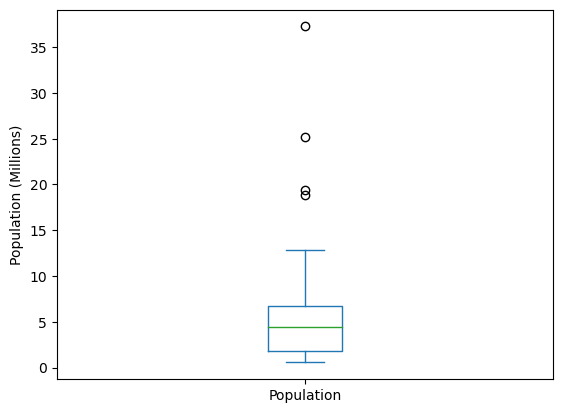

In [15]:
# a boxplot to see population distribution

box = (state["Population"]/1_000_000).plot.box()
box.set_ylabel("Population (Millions)")

In [18]:
# frequency tables histograms, but first segment the population using cut in 10 bins

binned_population = pd.cut(state["Population"],10)
binned_population.value_counts() # this show the amount of population in each bin

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0, 0.5, 'Population (Millions)')

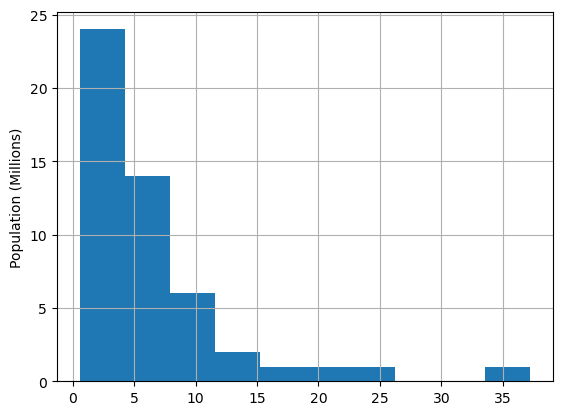

In [21]:
hist_data = (state["Population"]/1_000_000).hist(bins=10) # draws a histogram with 10 bins, with the values obtained from the population
hist_data.set_ylabel("Population (Millions)")